test bin file load in 

In [2]:
# import os
# os.chdir('C:/Users/xiao-zy19/Desktop/good_cs')

In [3]:
import numpy as np

data = np.fromfile('Good_cplx_spikes.bin', dtype=np.int16)
print(data.shape)

(783717120,)


In [4]:
reshaped_data = data.reshape((-1, 128))
print(reshaped_data.shape)

(6122790, 128)


In [5]:
samples_per_channel = reshaped_data.shape[0]
sampling_rate = 30000  # 30kHz

# calculate total time
total_time_seconds = samples_per_channel / sampling_rate

print(f'total time: {total_time_seconds} seconds')

total time: 204.093 seconds


In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=1000)
for i in range(1):
    x = reshaped_data[4024805:4025005, 23]
    
    plt.subplot(1, 1, i + 1)
    plt.plot(x)
    plt.title(f'Channel {i+1}')
    plt.xlim(0, len(x))
    plt.tight_layout()
    plt.grid(linestyle='--', alpha=0.7)

plt.show()
# print(f'channelly mean: {np.mean(reshaped_data, axis=0)}')

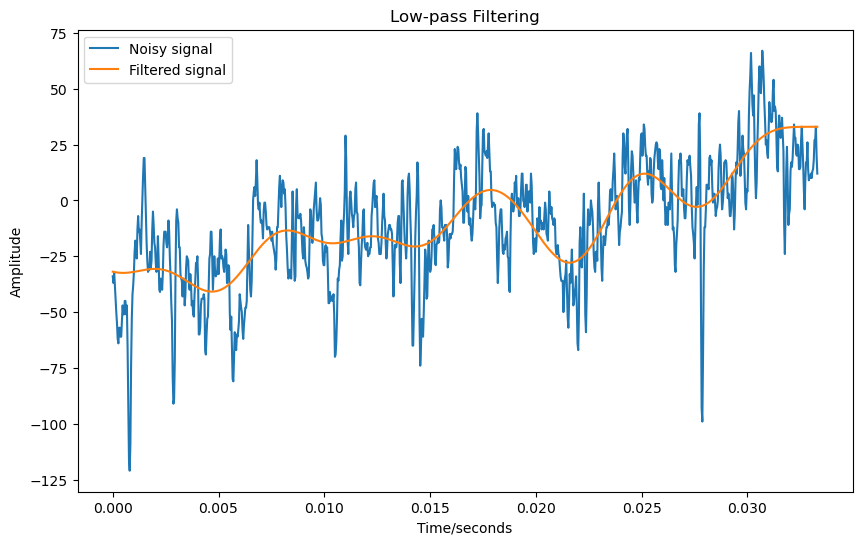

In [7]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

fs = 30000  # sampling frequency
t = np.arange(0, 1/30, 1 / fs)
x = reshaped_data[200000:201000, 0] # original data

# low pass filter
nyq = 0.5 * fs  # nyquist frequency
normal_cutoff = 200 / nyq  # 200Hz cutoff frequency
b, a = butter(N=5, Wn=normal_cutoff, btype="low", analog=False)

y = filtfilt(b, a, x)

# plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Noisy signal")
plt.plot(t, y, label="Filtered signal")
plt.xlabel("Time/seconds")
plt.ylabel("Amplitude")
plt.title("Low-pass Filtering")
plt.legend()
plt.show()

In [8]:
# print(np.std(reshaped_data, axis=0))
# print(np.max(reshaped_data, axis=0))
from scipy.signal import find_peaks

# set threshold to 5 std
threshold = 4 * np.std(reshaped_data, axis=0)
# print(f'threshold: {threshold}')
peaks, _ = find_peaks(reshaped_data[:, 0], height=threshold[0], prominence=30)
print(f'peaks: \n{peaks[0:9]}')
print(f'peaks count: {len(peaks)}')

peaks: 
[352940 353051 353082 353464 380195 530901 531128 531242 531246]
peaks count: 352


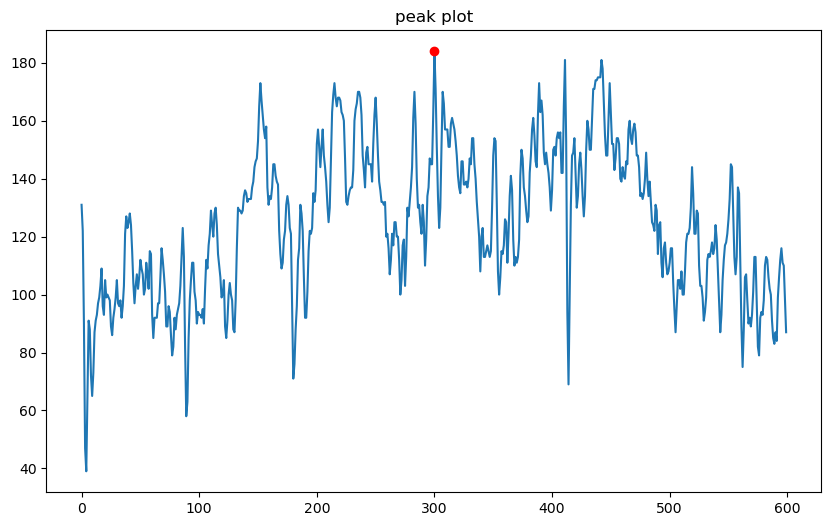

In [9]:
# plot the first peak
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
x = reshaped_data[peaks[0]-300:peaks[0]+300, 0]
plt.plot(x)
plt.title('peak plot')
# make peak red
plt.plot(300, x[300], 'ro')
plt.show()

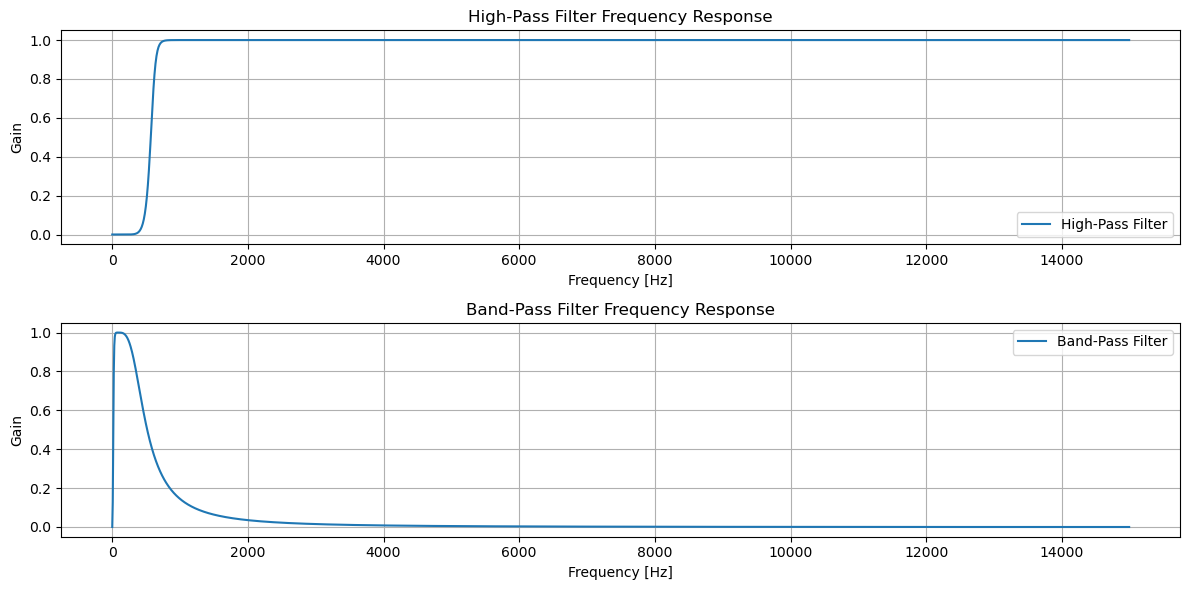

In [10]:
import numpy as np
from scipy.signal import butter, sosfilt, sosfreqz
import matplotlib.pyplot as plt

# Sample rate and desired cutoff frequencies
fs = 30000  # Sample rate
lowcut = 600  # High-pass filter cutoff frequency, Hz for the high-pass filter
highcut = 400  # High corner frequency for the band-pass filter
lowcut_bp = 20  # Low corner frequency for the band-pass filter

# Function to design a Butterworth High-Pass Filter
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    sos = butter(order, normal_cutoff, btype='high', analog=False, output='sos')
    return sos

# Function to design a Butterworth Band-Pass Filter
def butter_bandpass(lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], btype='band', analog=False, output='sos')
    return sos

# Function to apply a filter using Second-Order Sections
def apply_filter(data, sos):
    y = sosfilt(sos, data)
    return y

# Design filters
sos_highpass = butter_highpass(lowcut, fs, order=10)
sos_bandpass = butter_bandpass(lowcut_bp, highcut, fs, order=2)

# Frequency response for the filters
f_hp, h_hp = sosfreqz(sos_highpass, worN=2000, fs=fs)
f_bp, h_bp = sosfreqz(sos_bandpass, worN=2000, fs=fs)

# Plotting the frequency response
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(f_hp, abs(h_hp), label="High-Pass Filter")
plt.title('High-Pass Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(f_bp, abs(h_bp), label="Band-Pass Filter")
plt.title('Band-Pass Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
import numpy as np

# Assuming `low_freq_data` is your low-frequency data array
threshold = ...  # Define your threshold value
crossing_points = np.where(np.diff((low_freq_data > threshold).astype(int)) == 1)[0]


NameError: name 'low_freq_data' is not defined